In [103]:
import qiskit
from Data.QuantumCircuitGraph import *

# Basic Equivalences

## Null Operations

Select a basic starting circuit to which apply null operations

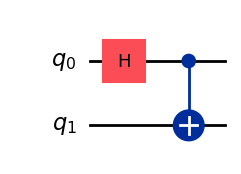

In [104]:
qc_base = qiskit.QuantumCircuit(2)
qc_base.h(0)
qc_base.cx(0, 1)

qc_base.draw(output='mpl')

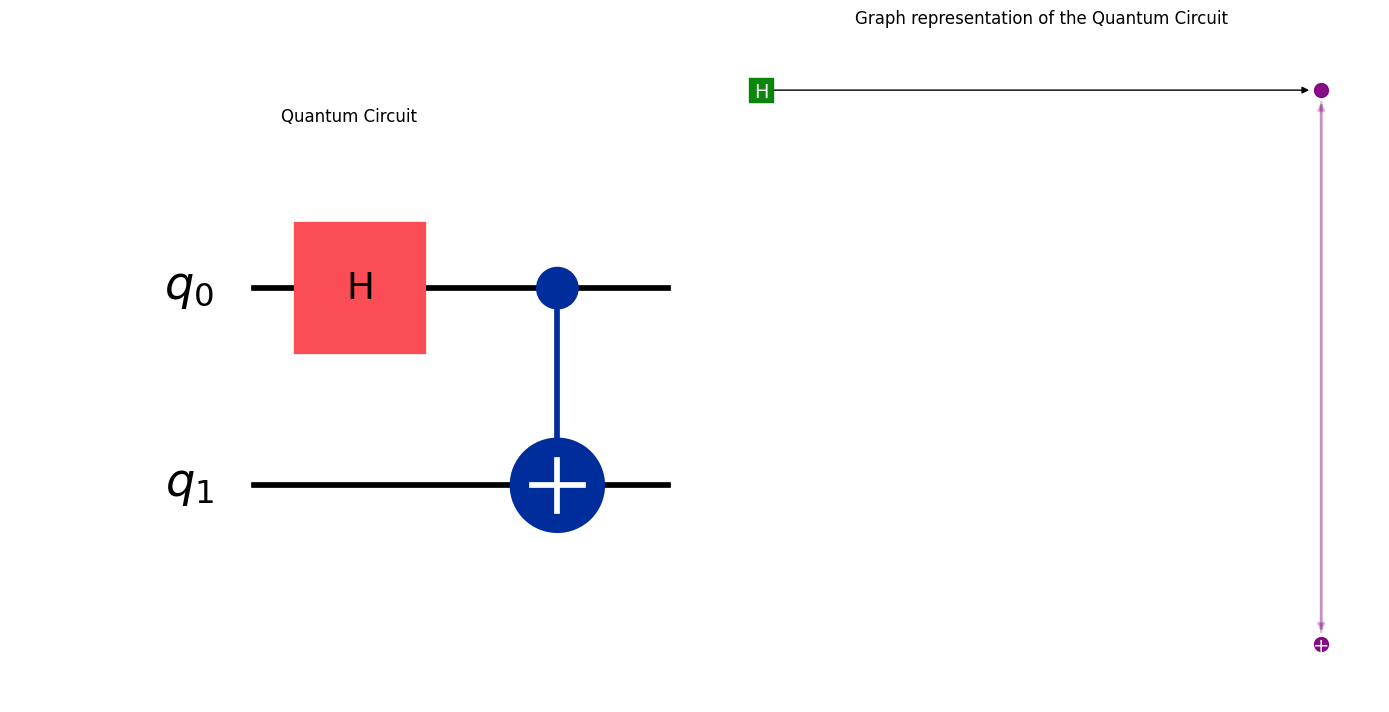

In [105]:
qcg_base = QuantumCircuitGraph(qc_base)
qcg_base.draw_circuit_and_graph(circuit_like_graph=True)

In [106]:
# Create a list to store the equivalent quantum circuits (tuples of quantum circuits and their corresponding graph)
equivalent_qcs = []

equivalent_qcs.append((qc_base, qcg_base.graph))

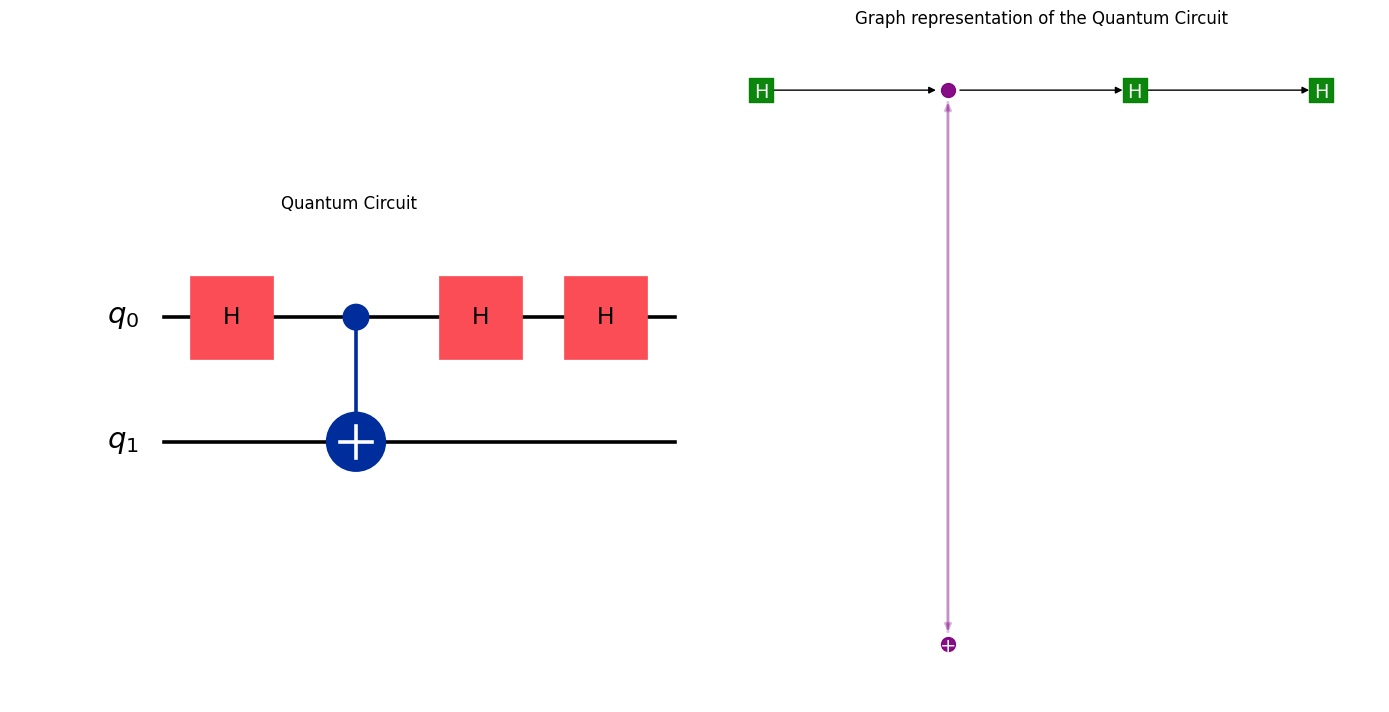

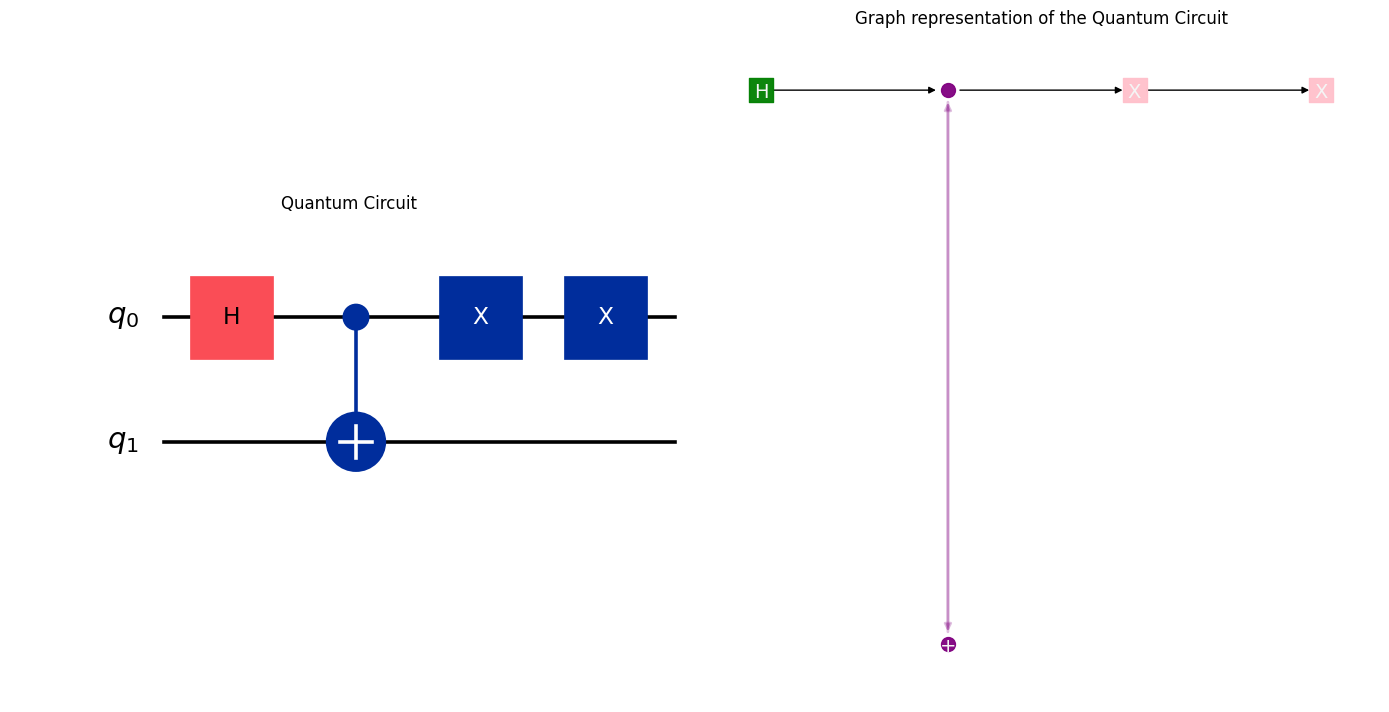

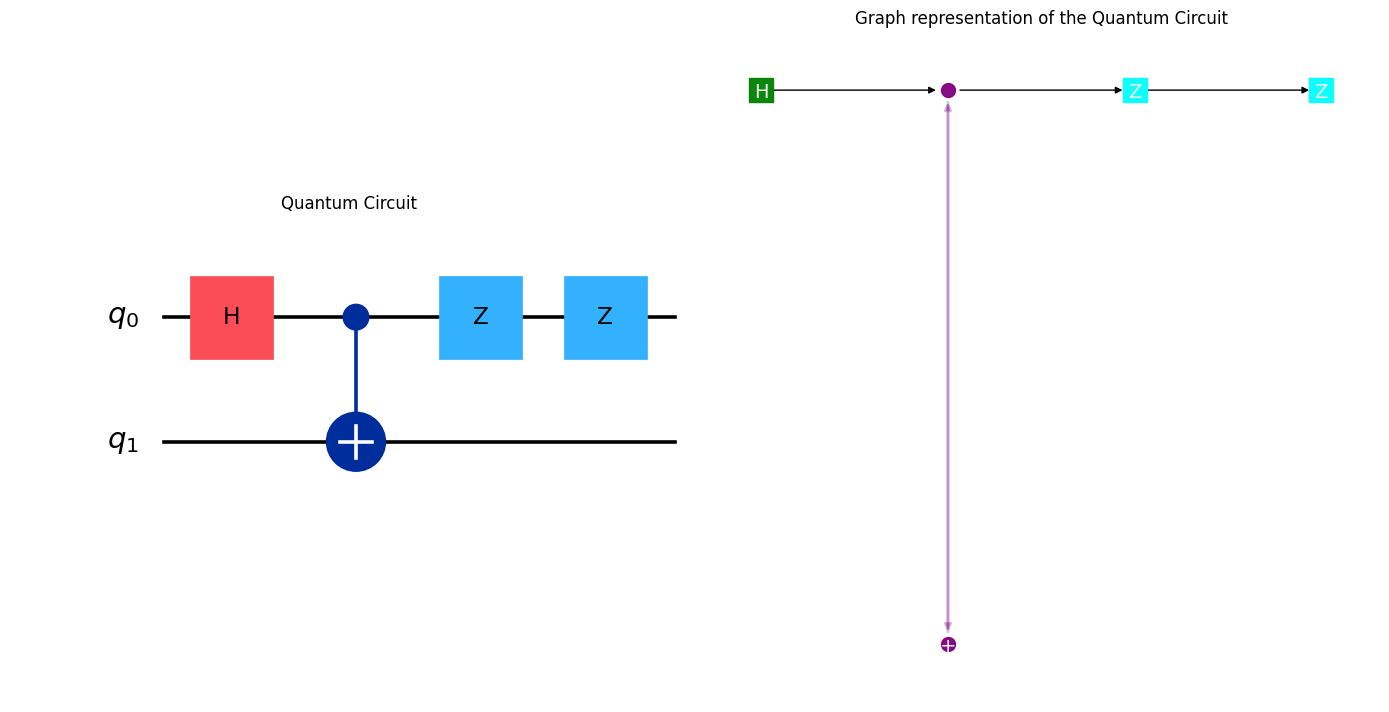

In [107]:
from qiskit.circuit.library.standard_gates import HGate, XGate, YGate, ZGate

# Apply two identical gates to the first qubit (do it for gates H, X, Z)
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qc_base.copy()

    qc.append(u, [0])
    qc.append(u, [0])

    qcg = QuantumCircuitGraph(qc)
    qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))


In [108]:
# Do the same for the second qubit
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qc_base.copy()

    qc.append(u, [1])
    qc.append(u, [1])

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

In [109]:
# Do the same for the two qubits, but now add the gates before the CNOT
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qiskit.QuantumCircuit(2)
    qc.h(0)

    qc.append(u, [0])
    qc.append(u, [0])
    qc.cx(0, 1)

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

# Do the same for the second qubit
for u in [HGate(), XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qiskit.QuantumCircuit(2)
    qc.h(0)

    qc.append(u, [1])
    qc.append(u, [1])
    qc.cx(0, 1)

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

# Do the same for the two qubits, but now add the gates before H
for u in [XGate(), ZGate()]:
    # copy qc_base in a new quantum circuit
    qc = qiskit.QuantumCircuit(2)
    qc.append(u, [0])
    qc.append(u, [0])
    qc.h(0)
    qc.cx(0, 1)

    qcg = QuantumCircuitGraph(qc)
    #qcg.draw_circuit_and_graph(circuit_like_graph=True)

    equivalent_qcs.append((qc, qcg.graph))

In [110]:
from math import ceil
from Data.data_preprocessing import draw_circuit_and_graph
import numpy as np

def draw_dataset(dataset, title=None):
    n_samples = len(dataset)
    samples_per_row = 3
    n_rows = ceil(n_samples / samples_per_row)
    add_height = 2
    fig, axs = plt.subplots(n_rows, 2*samples_per_row, figsize=(15, 3*n_samples/3 + add_height*(1/(n_rows)**2)))

    if n_rows == 1:
       axs = np.expand_dims(axs, axis=0)

    # dataset is a list of tuples (qc, qcg)
    for i, (qc, g) in enumerate(dataset):
        row = i // samples_per_row
        col_start = 2 * (i % samples_per_row)
        axs[row, col_start:col_start + 2] 

        draw_circuit_and_graph((qc, g), axs=axs[row, col_start:col_start + 2])
    
    if title is not None:
        plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

    

In [111]:
# now add two consecutive CNOTs to the base circuit
qc = qc_base.copy()
qc.cx(0, 1)
qc.cx(0, 1)

qcg = QuantumCircuitGraph(qc)
#qcg.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc, qcg.graph))

# do the same, but revert control and target qubits
qc = qc_base.copy()
qc.cx(1, 0)
qc.cx(1, 0)

qcg = QuantumCircuitGraph(qc)
#qcg.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc, qcg.graph))

# now add them before the first CNOT
qc = qiskit.QuantumCircuit(2)
qc.h(0)

qc.cx(1, 0)
qc.cx(1, 0)
qc.cx(0, 1)

qcg = QuantumCircuitGraph(qc)
#qcg.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc, qcg.graph))

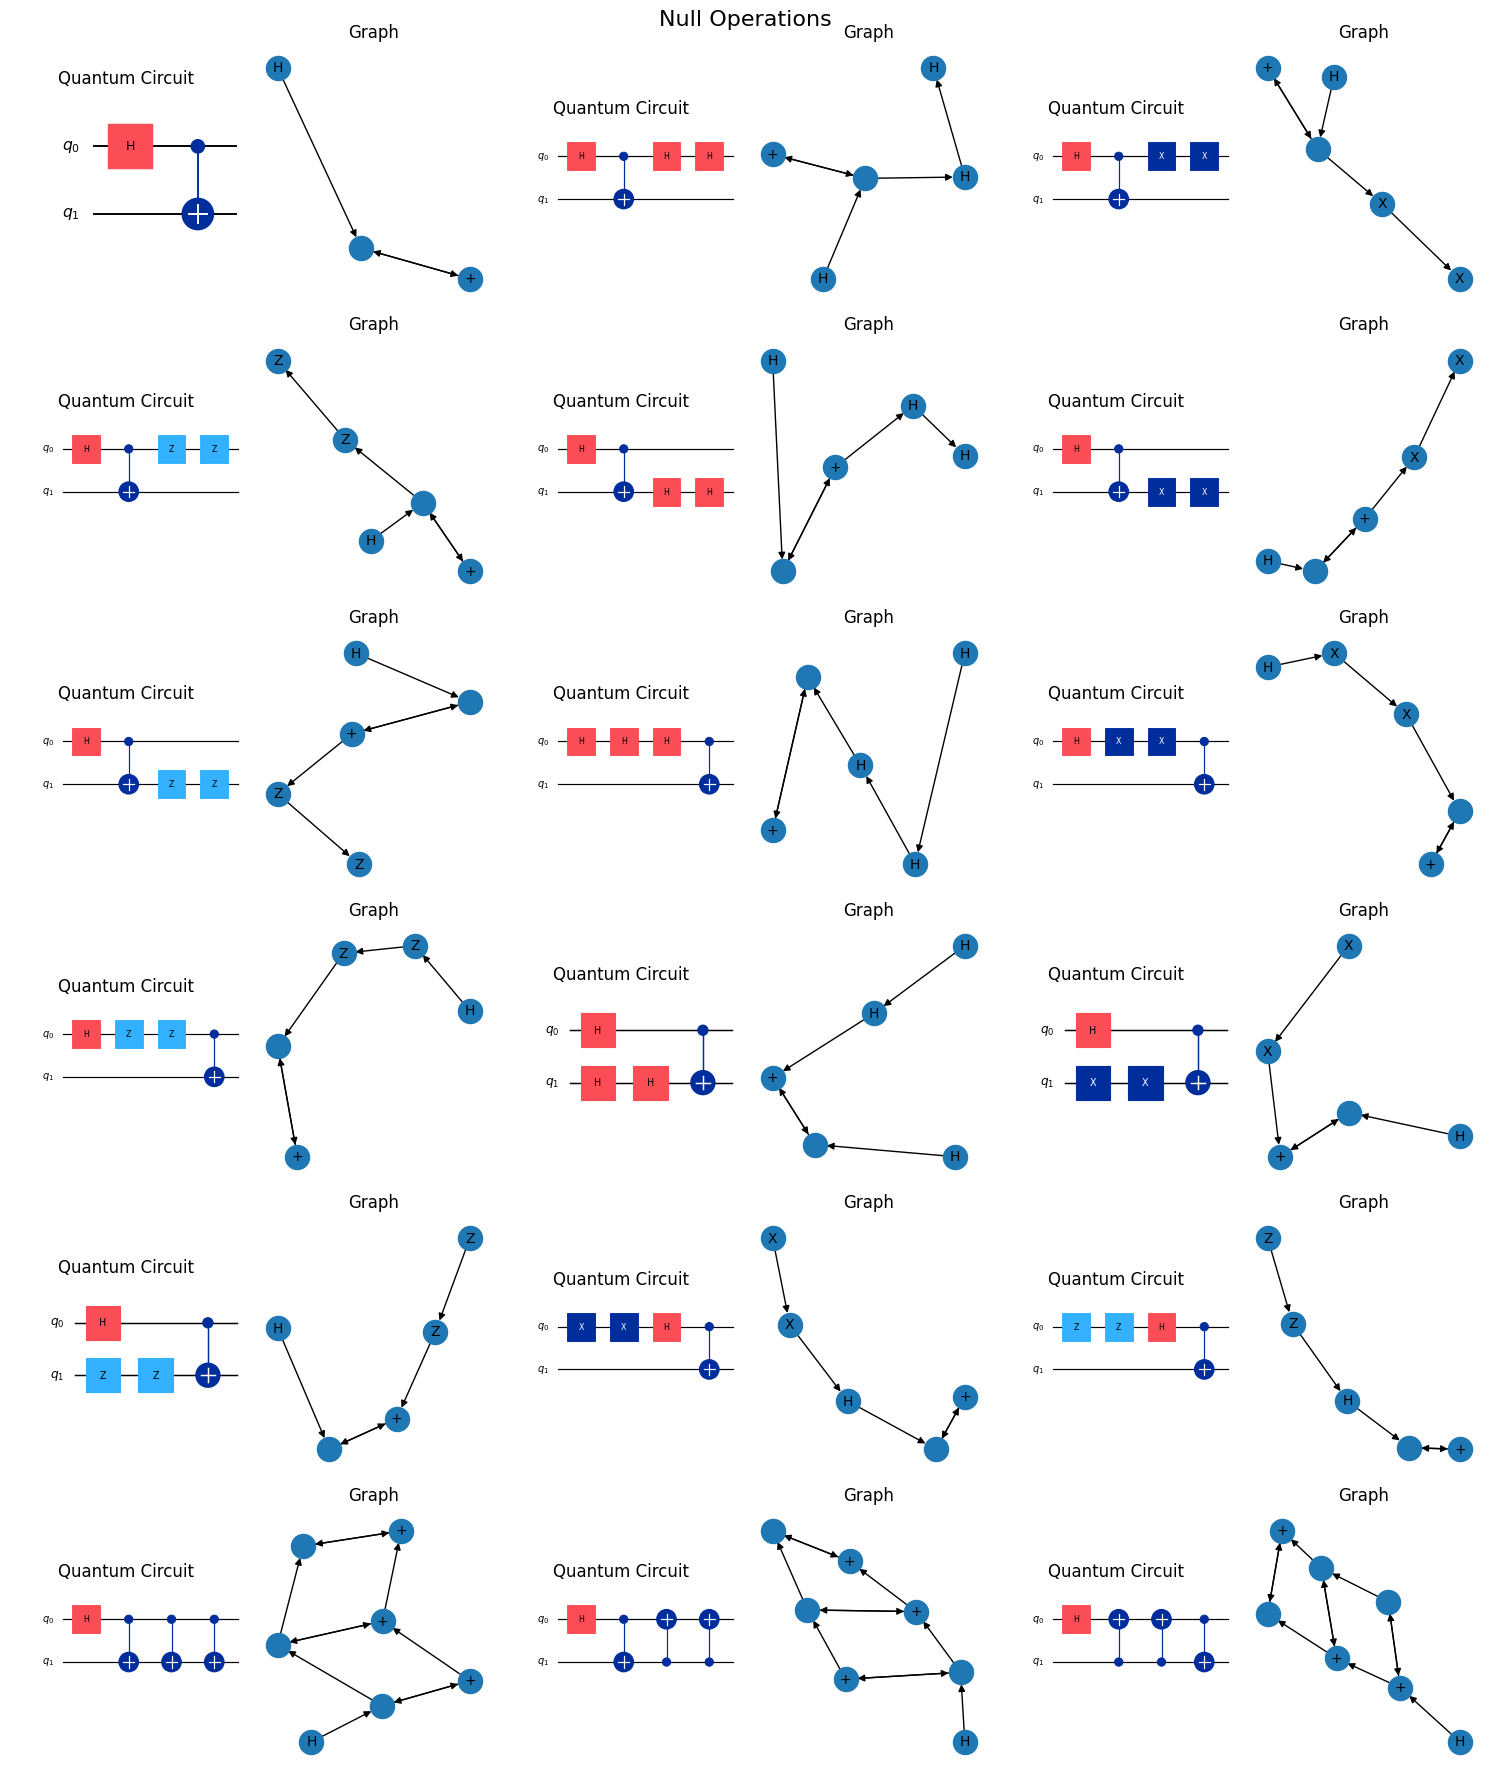

In [112]:
draw_dataset(equivalent_qcs, title='Null Operations')

In [113]:
dataset = {}
dataset['null_ops'] = equivalent_qcs

equivalent_qcs = []

## Commutations

First create a dataset with only the equivalences between commuting gates

In [114]:
# two consecutive CNOTs with the same control qubit, but different target qubits
qc_base = qiskit.QuantumCircuit(3)
# add some gates to make sure the equivalence is not trivial (if not we will obtain the same graph
qc_base.x(1)
qc_base.z(2)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)
qc_0.cx(0, 2)

qcg_0 = QuantumCircuitGraph(qc_0)


qc_1 = qc_base.copy()
qc_1.cx(0, 2)
qc_1.cx(0, 1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

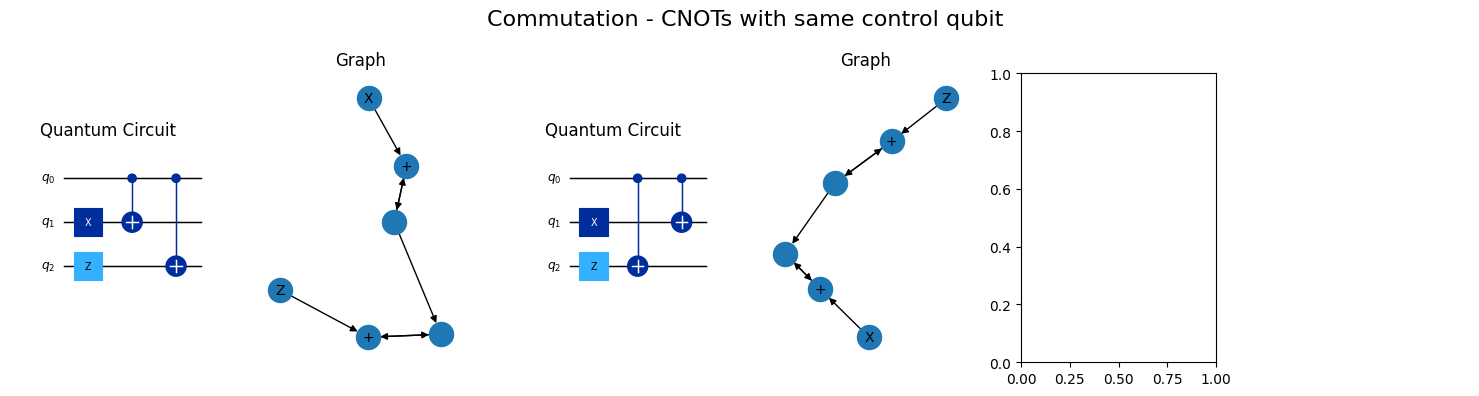

In [115]:
draw_dataset(equivalent_qcs, title='Commutation - CNOTs with same control qubit')

# Dataset section for commutations will be a list of lists of tuples, so a list of lists of equivalent quantum circuits
dataset['commutations'] = [equivalent_qcs]
equivalent_qcs = []

In [116]:
# two consecutive CNOTs with the same target qubit, but different control qubits
qc_base = qiskit.QuantumCircuit(3)
# add some gates to make sure the equivalence is not trivial (if not we will obtain the same graph
qc_base.h(0)
qc_base.z(2)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)
qc_0.cx(2, 1)

qcg_0 = QuantumCircuitGraph(qc_0)
 
qc_1 = qc_base.copy()
qc_1.cx(2, 1)
qc_1.cx(0, 1)   

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

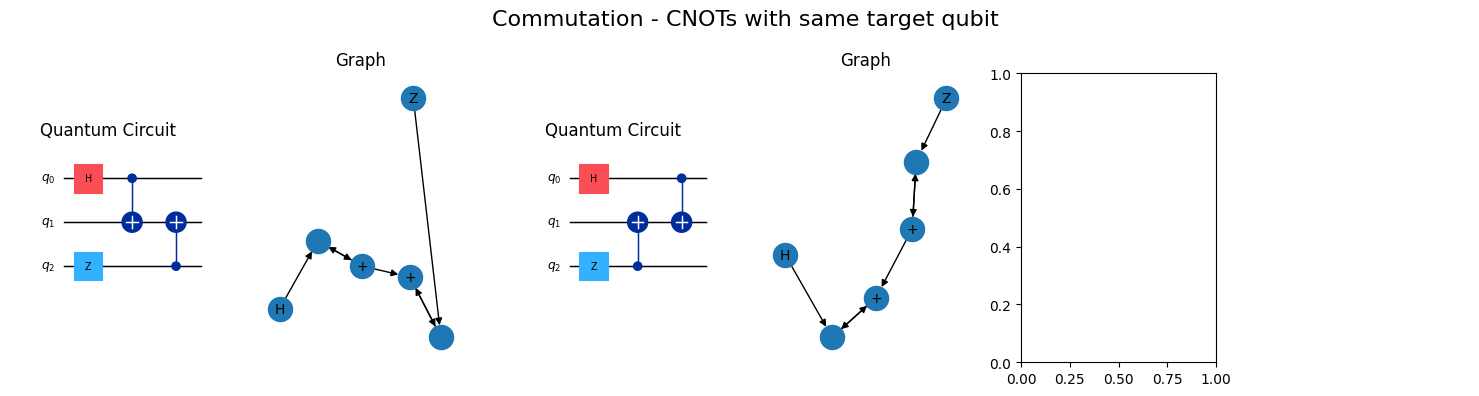

In [117]:
draw_dataset(equivalent_qcs, title='Commutation - CNOTs with same target qubit')

dataset['commutations'].append(equivalent_qcs)
equivalent_qcs = []

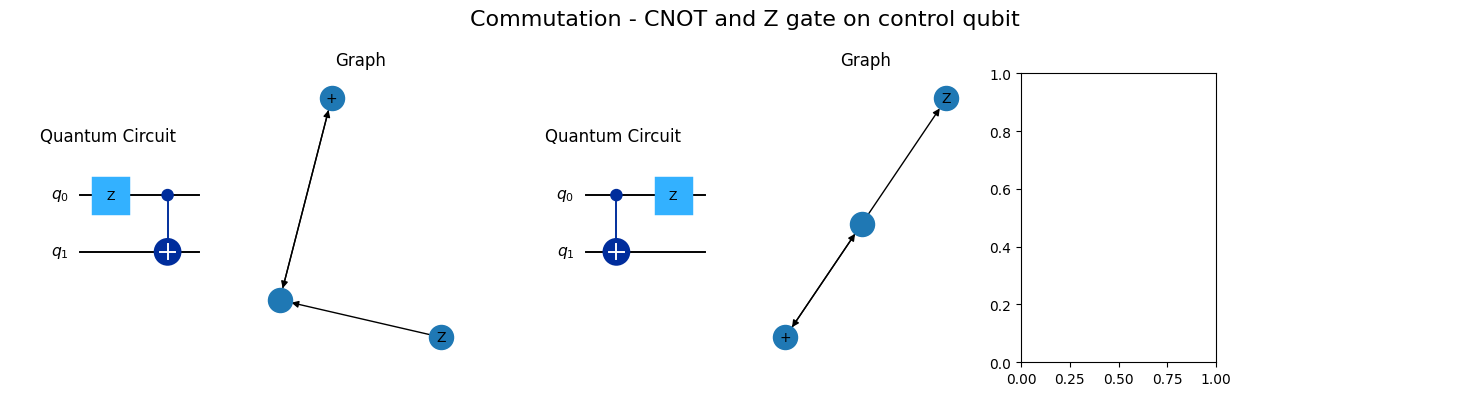

In [118]:
# CNOT and a Z gate applied to the control qubit (more in general any rotation around the Z axis)
qc_base = qiskit.QuantumCircuit(2)

qc_0 = qc_base.copy()
qc_0.z(0)
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 1)
qc_1.z(0)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Commutation - CNOT and Z gate on control qubit')
dataset['commutations'].append(equivalent_qcs)
equivalent_qcs = []

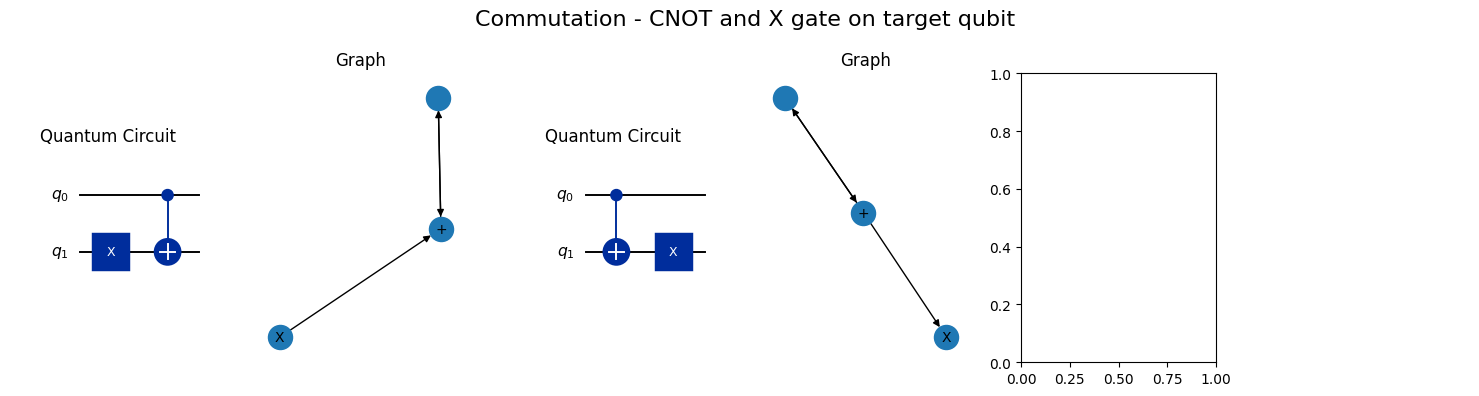

In [119]:
# CNOT and a X gate applied to the target qubit (more in general any rotation around the X axis)
qc_0 = qc_base.copy()
qc_0.x(1)
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 1)
qc_1.x(1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Commutation - CNOT and X gate on target qubit')
dataset['commutations'].append(equivalent_qcs)
equivalent_qcs = []

## Equivalent sets of gates

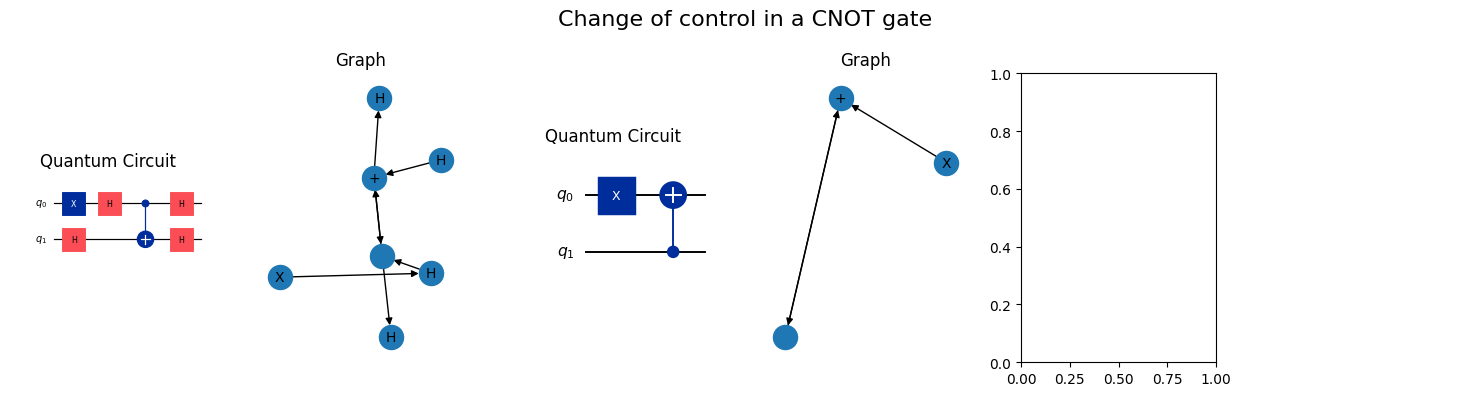

In [120]:
# Change of control in a CNOT gate
# To change the control qubit in a CNOT gate, we can use the following identity:
# CNOT_{01} = H_0 H_1 CNOT_{10} H_1 H_0
qc_base = qiskit.QuantumCircuit(2)
qc_base.x(0) # to enforce the swap between the control and target qubits

qc_0 = qc_base.copy()
qc_0.h(0)
qc_0.h(1)
qc_0.cx(0, 1)
qc_0.h(1)
qc_0.h(0)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(1, 0)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change of control in a CNOT gate')
dataset['equivalences'] = [equivalent_qcs]
equivalent_qcs = []

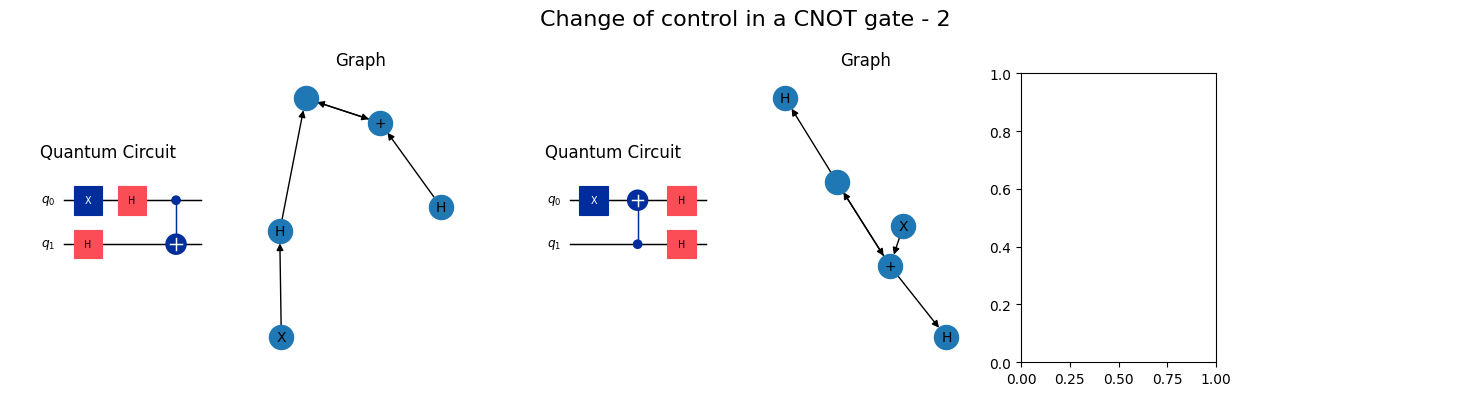

In [121]:
# Another way to change the control qubit in a CNOT gate is to use the following identity:
# H_0 H_1 CNOT_{01} = CNOT_{10} H_0 H_1

qc_base = qiskit.QuantumCircuit(2)
qc_base.x(0) 
# X to enforce the swap between the control and target qubits 
# (if the two qubits do not swap, the identity is not true, unless the two qubits are in the same state)

qc_0 = qc_base.copy()
qc_0.h(0)
qc_0.h(1)
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(1, 0)
qc_1.h(0)
qc_1.h(1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change of control in a CNOT gate - 2')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

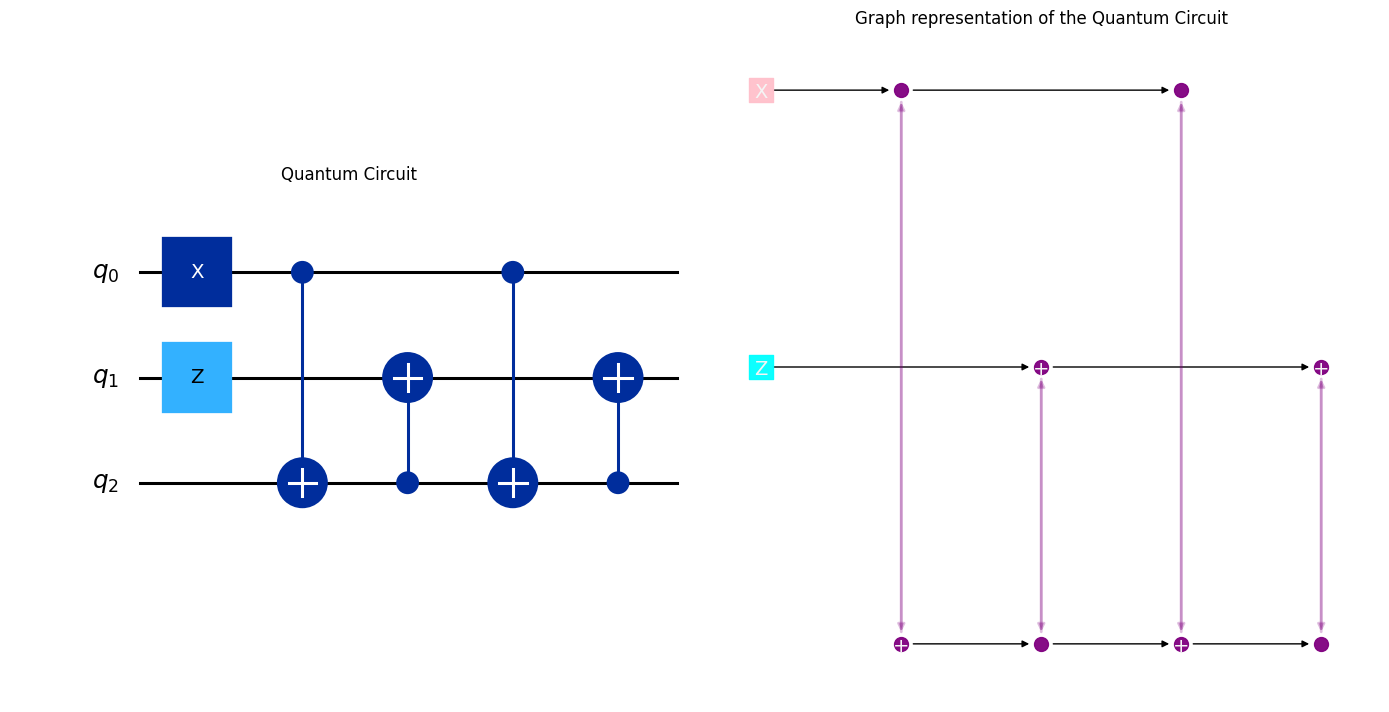

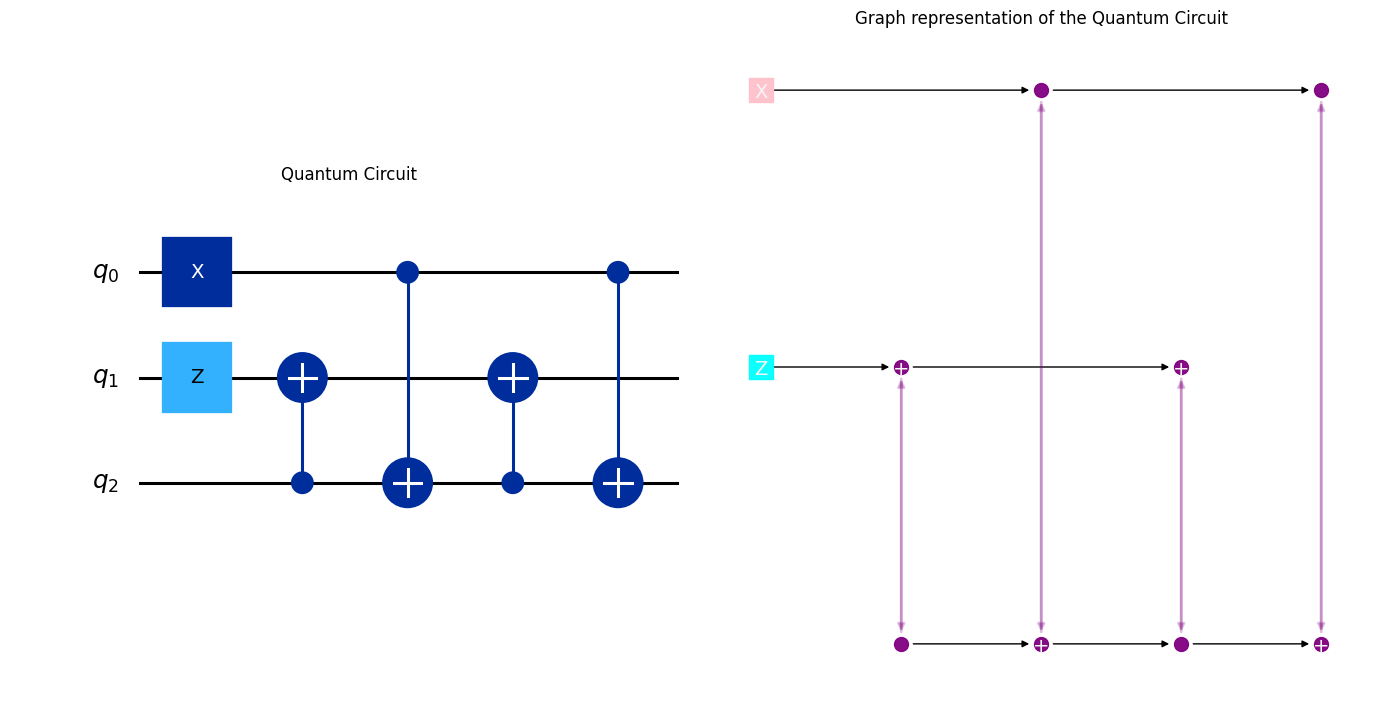

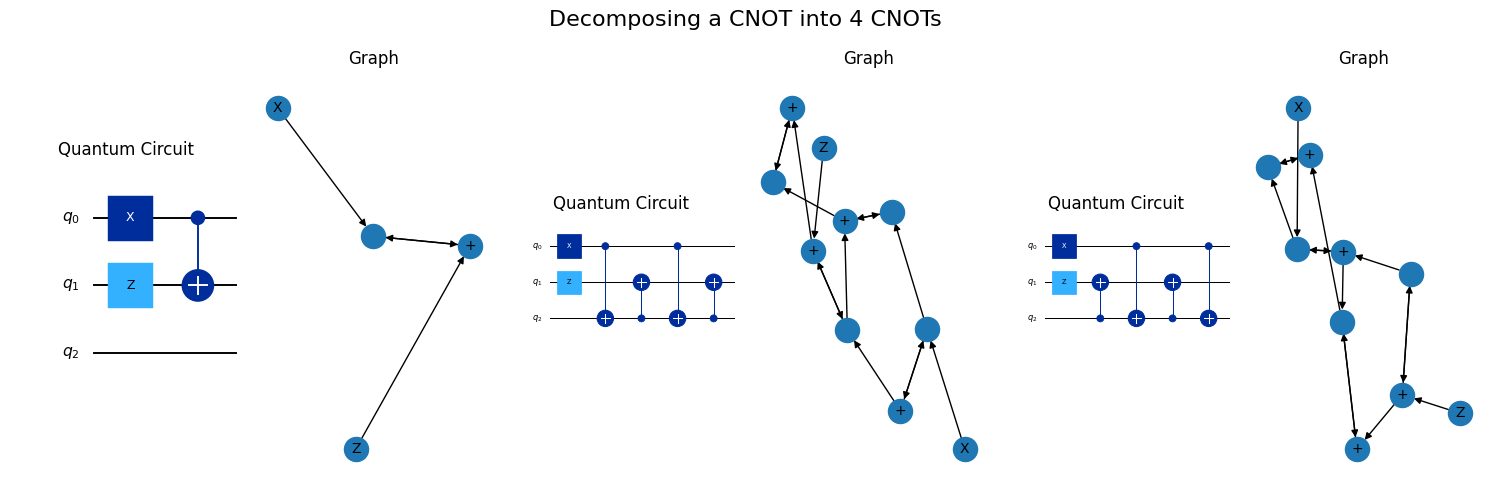

In [122]:
# Decomposing a CNOT into 4 CNOTs, using an ancilla qubit:
# CNOT_{01} = CNOT_{02} CNOT_{21} CNOT_{02} CNOT_{21}

qc_base = qiskit.QuantumCircuit(3)
qc_base.x(0)
qc_base.z(1)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 2)
qc_1.cx(2, 1)
qc_1.cx(0, 2)
qc_1.cx(2, 1)

qcg_1 = QuantumCircuitGraph(qc_1)
qcg_1.draw_circuit_and_graph(circuit_like_graph=True)

# also the following circuit is equivalent to the previous one
# CNOT_{01} = CNOT_{21} CNOT_{02} CNOT_{21} CNOT_{02}
qc_2 = qc_base.copy()
qc_2.cx(2, 1)
qc_2.cx(0, 2)
qc_2.cx(2, 1)
qc_2.cx(0, 2)

qcg_2 = QuantumCircuitGraph(qc_2)
qcg_2.draw_circuit_and_graph(circuit_like_graph=True)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))
equivalent_qcs.append((qc_2, qcg_2.graph))

draw_dataset(equivalent_qcs, title='Decomposing a CNOT into 4 CNOTs')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []


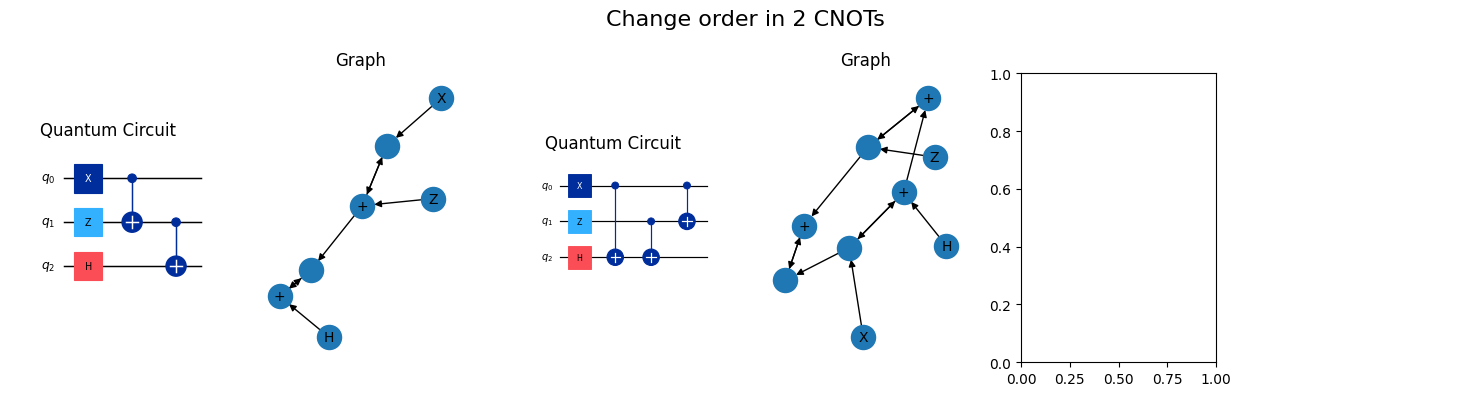

In [123]:
# Change order in 2 CNOTs having the target of the first CNOT as control of the second CNOT, using a 3rd CNOT
# CNOT_{01} CNOT_{12} = CNOT_{02} CNOT_{12} CNOT_{01}

qc_base = qiskit.QuantumCircuit(3)
qc_base.x(0)
qc_base.z(1)
qc_base.h(2)

qc_0 = qc_base.copy()
qc_0.cx(0, 1)
qc_0.cx(1, 2)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 2)
qc_1.cx(1, 2)
qc_1.cx(0, 1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Change order in 2 CNOTs')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []


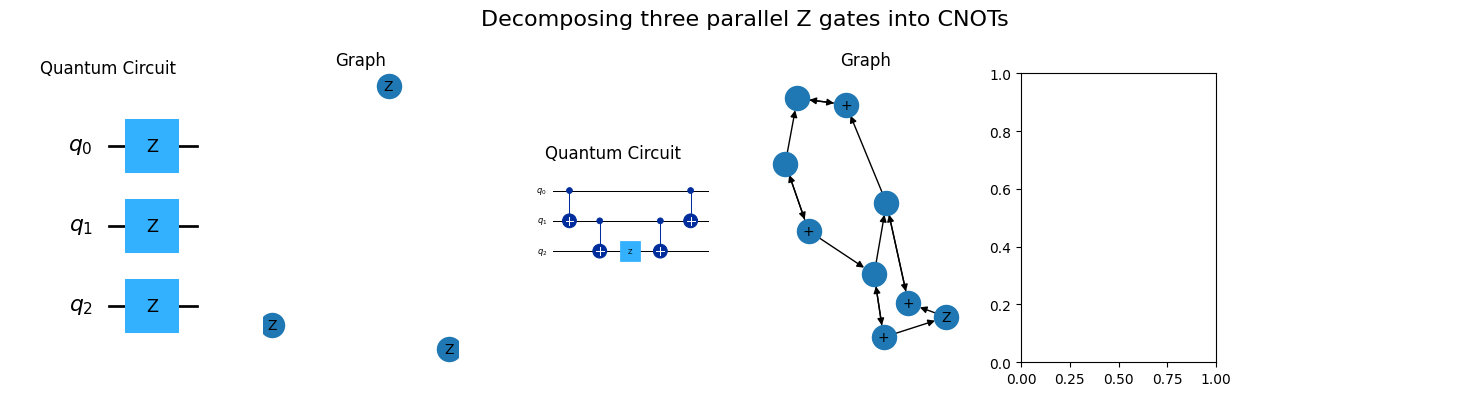

In [124]:
# Decomposing three parallel Z gates into CNOTs, using the following identity:
# Z_0 Z_1 Z_2 = CNOT_{01} CNOT_{12} Z{2} CNOT_{12} CNOT_{01}

qc_base = qiskit.QuantumCircuit(3)

qc_0 = qc_base.copy()
qc_0.z(0)
qc_0.z(1)
qc_0.z(2)
# TODO: grafi non connessi sono ok??

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qc_base.copy()
qc_1.cx(0, 1)
qc_1.cx(1, 2)
qc_1.z(2)
qc_1.cx(1, 2)
qc_1.cx(0, 1)

qcg_1 = QuantumCircuitGraph(qc_1)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))

draw_dataset(equivalent_qcs, title='Decomposing three parallel Z gates into CNOTs')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

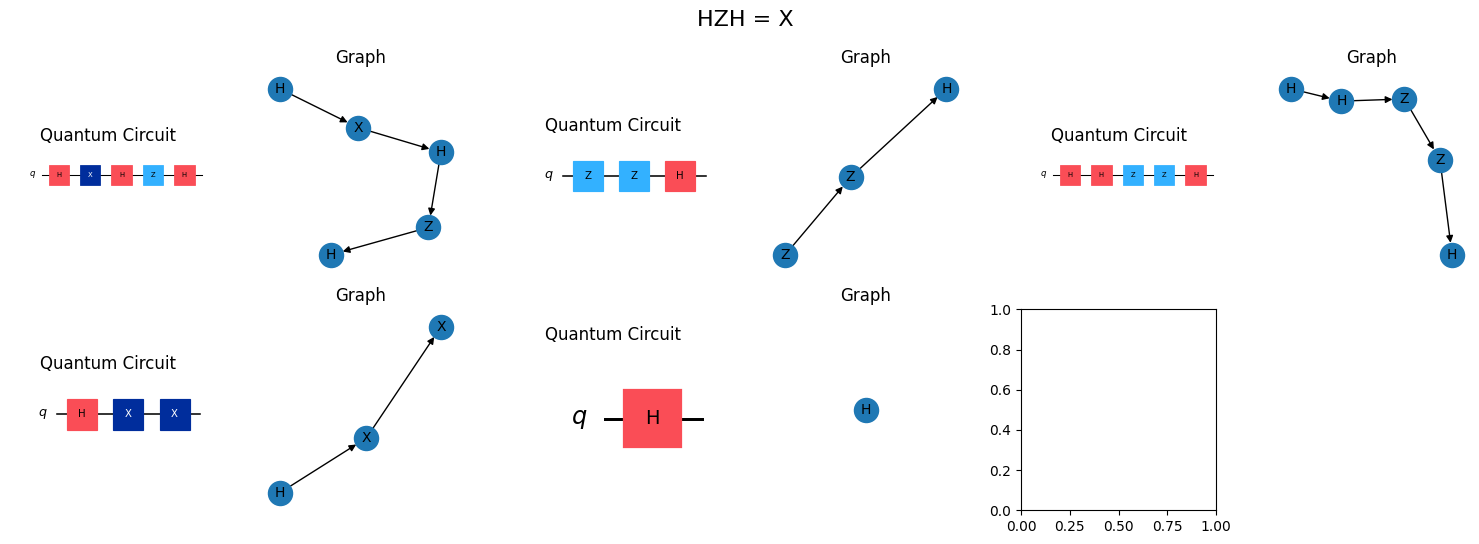

In [125]:
# HZH = X, but also HZ = XH, Z = HXH
qc_0 = qiskit.QuantumCircuit(1)
qc_0.h(0)
qc_0.x(0)
qc_0.h(0)
qc_0.z(0)
qc_0.h(0)

qcg_0 = QuantumCircuitGraph(qc_0)

qc_1 = qiskit.QuantumCircuit(1) # HXH = Z
qc_1.z(0)
qc_1.z(0)
qc_1.h(0)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_2 = qiskit.QuantumCircuit(1) # XH = HZ
qc_2.h(0)
qc_2.h(0)
qc_2.z(0)
qc_2.z(0)
qc_2.h(0)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_3 = qiskit.QuantumCircuit(1) # HZH = X
qc_3.h(0)
qc_3.x(0)
qc_3.x(0)

qcg_3 = QuantumCircuitGraph(qc_3)

# all these are equivalent to a single H gate
qc_4 = qiskit.QuantumCircuit(1)
qc_4.h(0)

qcg_4 = QuantumCircuitGraph(qc_4)

equivalent_qcs.append((qc_0, qcg_0.graph))
equivalent_qcs.append((qc_1, qcg_1.graph))
equivalent_qcs.append((qc_2, qcg_2.graph))
equivalent_qcs.append((qc_3, qcg_3.graph))
equivalent_qcs.append((qc_4, qcg_4.graph))

draw_dataset(equivalent_qcs, title='HZH = X')
dataset['equivalences'].append(equivalent_qcs)
equivalent_qcs = []

In [126]:
dataset_basic = dataset

# export the dataset
import pickle
with open('Data/dataset_basic.pkl', 'wb') as f:
    pickle.dump(dataset_basic, f)

# now we can load the dataset with the following command
# with open('Data/dataset_basic.pkl', 'rb') as f:
#    dataset = pickle.load(f)

# Dataset creation

In [149]:
dataset = {
    'basic': dataset_basic,
    'combined': []
    }

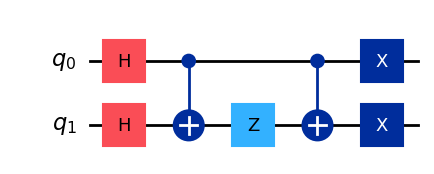

In [150]:
# SAMPLE 1
sample = []

qc = qiskit.QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.z(1)
qc.cx(0, 1)
qc.x(0)
qc.x(1)

qcg = QuantumCircuitGraph(qc)
sample.append((qc, qcg.graph))

qc.draw(output='mpl')

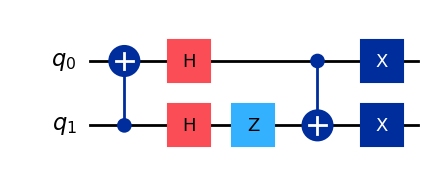

In [151]:
# swap the control and target qubits
qc_1 = qiskit.QuantumCircuit(2)
qc_1.cx(1,0)
qc_1.h(0)
qc_1.h(1)
qc_1.z(1)
qc_1.cx(0, 1)
qc_1.x(0)
qc_1.x(1)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

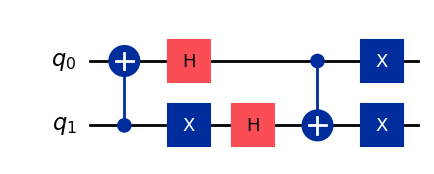

In [152]:
# swap the control and target qubits + HZ = XH
qc_2 = qiskit.QuantumCircuit(2)
qc_2.cx(1,0)
qc_2.h(0)
qc_2.x(1)
qc_2.h(1)
qc_2.cx(0, 1)
qc_2.x(0)
qc_2.x(1)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

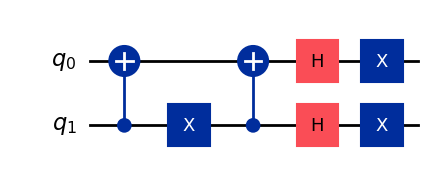

In [153]:
# 2 times swap the control and target qubits + HZ = XH
qc_3 = qiskit.QuantumCircuit(2)
qc_3.cx(1,0)
qc_3.x(1)
qc_3.cx(1, 0)
qc_3.h(0)
qc_3.h(1)
qc_3.x(0)
qc_3.x(1)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

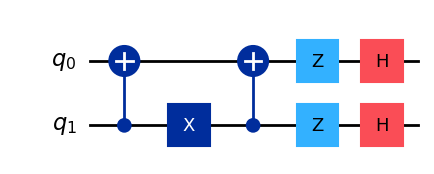

In [154]:
# 2 times swap the control and target qubits + HZ = XH + HX = ZH
qc_4 = qiskit.QuantumCircuit(2)
qc_4.cx(1,0)
qc_4.x(1)
qc_4.cx(1, 0)
qc_4.z(0)
qc_4.z(1)
qc_4.h(0)
qc_4.h(1)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

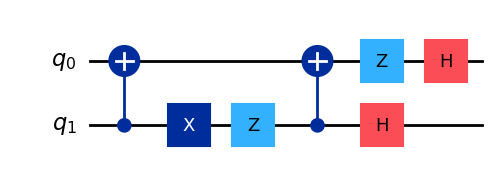

In [155]:
# [...] + CNOT and Z gate on control qubit commute
qc_5 = qiskit.QuantumCircuit(2)
qc_5.cx(1,0)
qc_5.x(1)
qc_5.z(1)
qc_5.cx(1, 0)
qc_5.z(0)
qc_5.h(0)
qc_5.h(1)

qcg_5 = QuantumCircuitGraph(qc_5)

qc_5.draw(output='mpl')

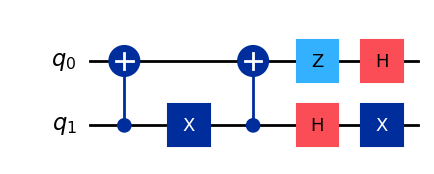

In [156]:
qc_6 = qiskit.QuantumCircuit(2)
qc_6.cx(1,0)
qc_6.x(1)
qc_6.cx(1, 0)
qc_6.z(0)
qc_6.h(0)
qc_6.h(1)
qc_6.x(1)

qcg_6 = QuantumCircuitGraph(qc_6)

qc_6.draw(output='mpl')

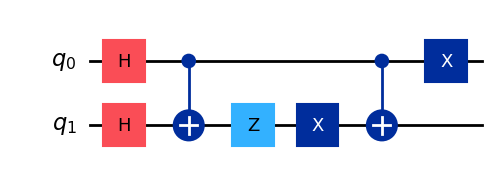

In [157]:
# CNOT and X gate on target qubit commute
qc_7 = qiskit.QuantumCircuit(2)
qc_7.h(0)
qc_7.h(1)
qc_7.cx(0, 1)
qc_7.z(1)
qc_7.x(1)
qc_7.cx(0, 1)
qc_7.x(0)

qcg_7 = QuantumCircuitGraph(qc_7)

qc_7.draw(output='mpl')

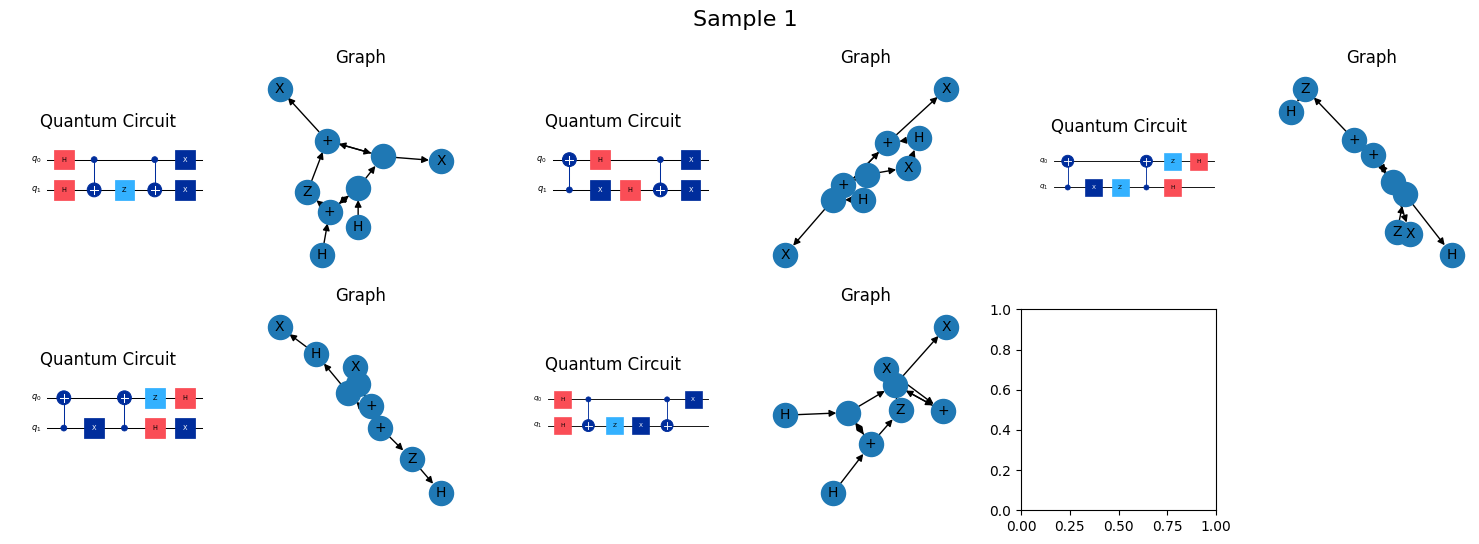

In [158]:
sample = [
    (qc, qcg.graph),
    (qc_2, qcg_2.graph),
    (qc_5, qcg_5.graph),
    (qc_6, qcg_6.graph),
    (qc_7, qcg_7.graph)
]

draw_dataset(sample, title='Sample 1')
dataset['combined'].append(sample)

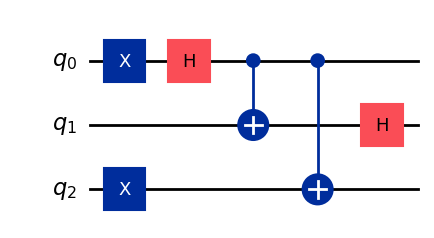

In [159]:
# SAMPLE 2
sample = []

qc = qiskit.QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.h(1)

qcg = QuantumCircuitGraph(qc)
sample.append((qc, qcg.graph))

qc.draw(output='mpl')

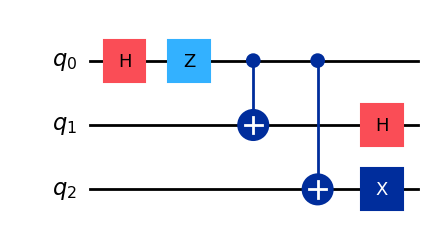

In [160]:
# XH = HZ + CNOT and X on target commute
qc_1 = qiskit.QuantumCircuit(3)
qc_1.h(0)
qc_1.z(0)
qc_1.cx(0, 1)
qc_1.cx(0, 2)
qc_1.h(1)
qc_1.x(2)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

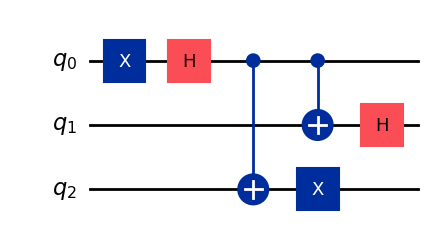

In [161]:
# CNOT with same control commute + CNOT and X on target commute
qc_2 = qiskit.QuantumCircuit(3)
qc_2.x(0)
qc_2.h(0)
qc_2.cx(0, 2)
qc_2.x(2)
qc_2.cx(0, 1)
qc_2.h(1)

qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

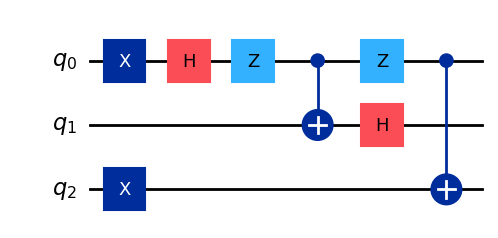

In [162]:
# add consecutive Z gates + CNOT and Z on control commute
qc_3 = qiskit.QuantumCircuit(3)
qc_3.x(0)
qc_3.x(2)
qc_3.h(0)
qc_3.z(0)
qc_3.cx(0, 1)
qc_3.z(0)
qc_3.cx(0, 2)
qc_3.h(1)

qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

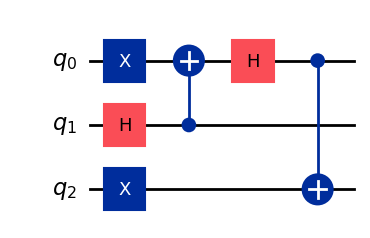

In [163]:
# swap control and target qubits in a CNOT + double H is identity
qc_4 = qiskit.QuantumCircuit(3)
qc_4.x(0)
qc_4.x(2)
qc_4.h(1)
qc_4.cx(1, 0)
qc_4.h(0)
qc_4.cx(0, 2)

qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

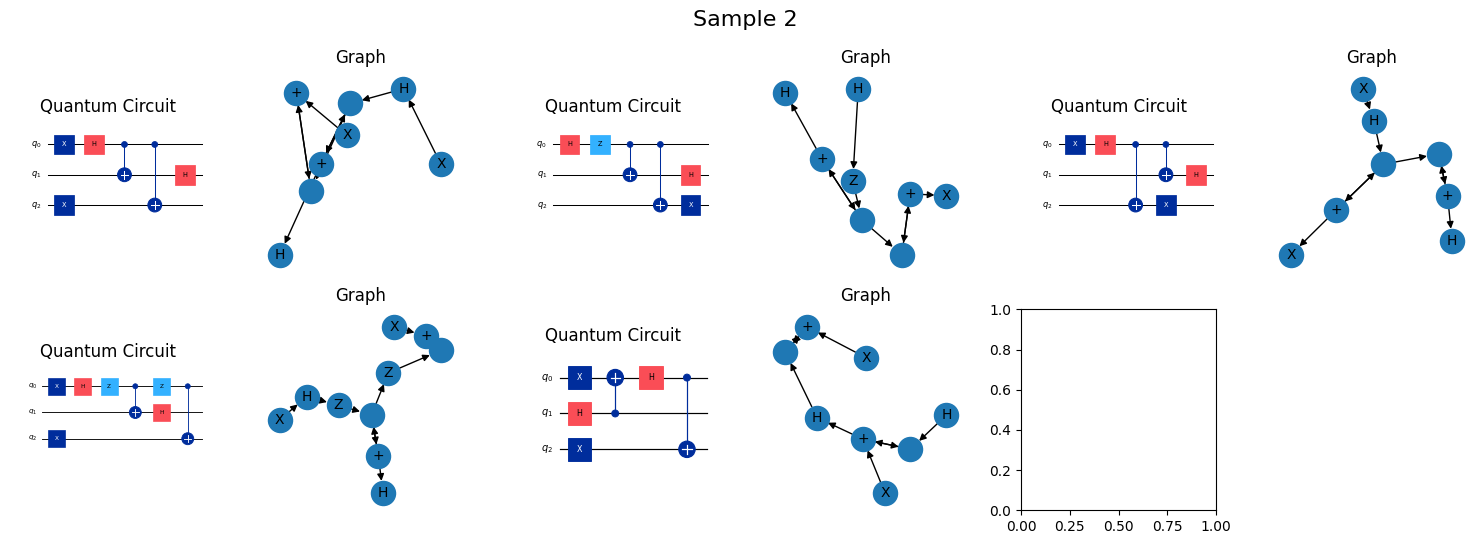

In [164]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 2')

dataset['combined'].append(sample)

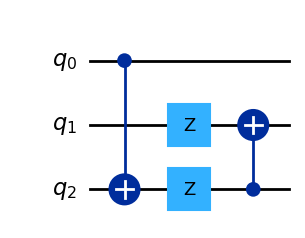

In [165]:
# SAMPLE 3
qc = qiskit.QuantumCircuit(3)
qc.cx(0, 2)
qc.z(1)
qc.z(2)
qc.cx(2,1)


qcg = QuantumCircuitGraph(qc)

qc.draw(output='mpl')

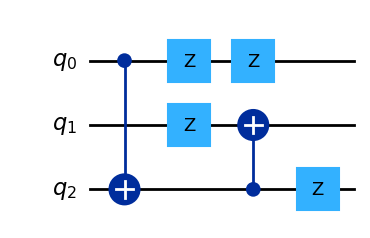

In [166]:
# CNOT and Z on control commute + double Z is identity
qc_1 = qiskit.QuantumCircuit(3)
qc_1.cx(0, 2)
qc_1.z(0)
qc_1.z(0)
qc_1.z(1)
qc_1.cx(2,1)
qc_1.z(2)

qcg_1 = QuantumCircuitGraph(qc_1)

qc_1.draw(output='mpl')

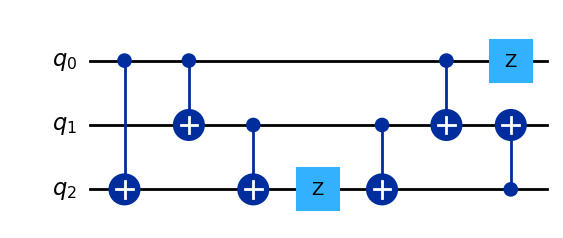

In [167]:
# double Z is identity + 3 parallel Z gates as CNOTs
qc_2 = qiskit.QuantumCircuit(3)
qc_2.cx(0, 2)

qc_2.cx(0, 1)
qc_2.cx(1, 2)
qc_2.z(2)
qc_2.cx(1, 2)
qc_2.cx(0, 1)

qc_2.z(0)
qc_2.cx(2,1)


qcg_2 = QuantumCircuitGraph(qc_2)

qc_2.draw(output='mpl')

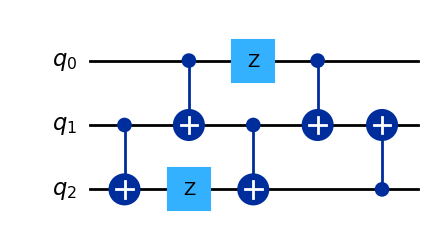

In [168]:
# qc_2 + change order in 2 CNOTs + CNOT and Z on control commute
qc_3 = qiskit.QuantumCircuit(3)
qc_3.cx(1, 2)
qc_3.cx(0, 1)
qc_3.z(2)
qc_3.z(0)
qc_3.cx(1, 2)
qc_3.cx(0, 1)
qc_3.cx(2,1)


qcg_3 = QuantumCircuitGraph(qc_3)

qc_3.draw(output='mpl')

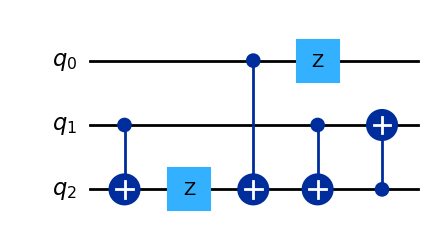

In [169]:
# qc_3 + change order in 2 CNOTs + CNOT with same control commute + double CNOT is identity
qc_4 = qiskit.QuantumCircuit(3)
qc_4.cx(1, 2)
qc_4.z(2)
qc_4.cx(0, 2)
qc_4.cx(1, 2)

qc_4.z(0)
qc_4.cx(2,1)


qcg_4 = QuantumCircuitGraph(qc_4)

qc_4.draw(output='mpl')

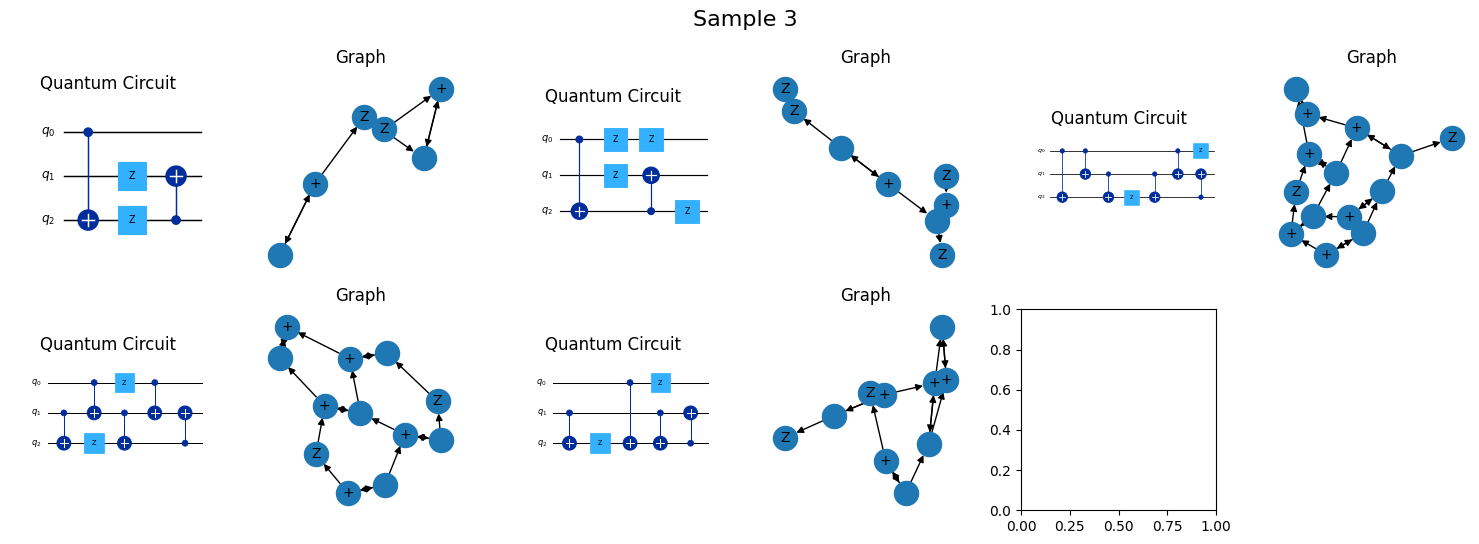

In [170]:
sample = [
    (qc, qcg.graph),
    (qc_1, qcg_1.graph), 
    (qc_2, qcg_2.graph), 
    (qc_3, qcg_3.graph), 
    (qc_4, qcg_4.graph)
    ]

draw_dataset(sample, title='Sample 3')

dataset['combined'].append(sample)

In [ ]:
# SAMPLE 4